In [84]:

import numpy as np
import math
import matplotlib
import matplotlib.pyplot as plt

bm br bl tr tl
[[0.5  0.   0.   0.25 0.25]
 [0.   0.   0.75 0.25 0.  ]
 [0.   0.75 0.   0.   0.25]
 [0.25 0.25 0.   0.   0.5 ]
 [0.25 0.   0.25 0.5  0.  ]]
bm b t
[[0.5 0.  0.5]
 [0.  1.5 0.5]
 [0.5 0.5 1. ]] [1. 2. 2.] [1. 2. 2.]
[[0.5  0.   0.5 ]
 [0.   0.75 0.25]
 [0.25 0.25 0.5 ]] [0.75 1.   1.25] [1. 1. 1.]


In [91]:
def vector_dist(v1, v2): # euclidean distance between 2 points
    return math.sqrt(np.sum([(v1[i] - v2[i])**2 for i in range(len(v1))]))

true_diag = [20, 59]
true_antidiag = [36, 35]


In [92]:

print(list(range(1)))


[0]


range diag dists:  0.14761903531253925 1.1931009283998155
range antidiag diss:  0.028169014084507043 1.1753603405647925


Text(0, 0.5, 'C_thresh')

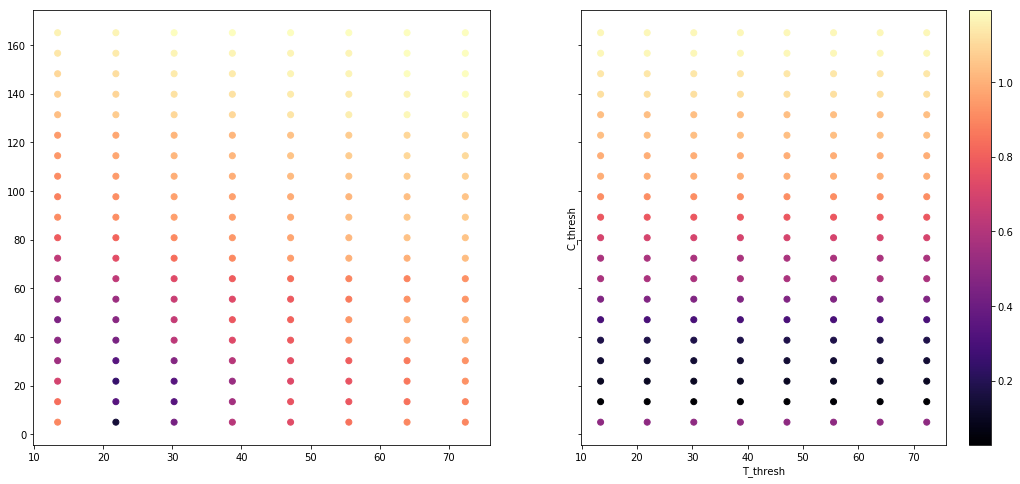

In [102]:
#broad observations array
trans_runs= np.load('trans_runs_2nd4ptscheck.npy')[()]
num_top_keys = 4
num_full_keys = 6
num_tran_keys = 5
index = list(range(len(np.linspace(5, 165, 20))**2))
c_threshes = []
t_threshes = []
trans_matrices = []
diags = []
antidiags = []

for i in index:
    #Top_bottoms, Full_classif, N_transitions = trans_runs[trans_fil]
    Top_bottoms, Full_classif, N_transitions, trans_threshes, num_top_keys, num_full_keys, num_tran_keys, skeys, ckeys, num_tran_keys, num_total_frames = trans_runs[i][0]
    if trans_threshes[0] <= 80 and trans_threshes[0] > 5:

        t_threshes.append(trans_threshes[0])
        c_threshes.append(trans_threshes[1])
        sums = np.sum
        Tb_sums = [sums(Top_bottoms[:, c]) for c in range(num_top_keys)]
        Fc_sums = [sums(Full_classif[:, c]) for c in range(num_full_keys)]
        Nt_sums = sums(N_transitions, axis = 0)#[sums(N_transitions[:, c]) for c in range(num_tran_keys)]
        T_obb = Nt_sums
        trans_matrices.append(T_obb)
        diags.append([T_obb[i, i] for i in range(len(T_obb))])
        antidiags.append([T_obb[i, len(T_obb)-i-1] for i in range(len(T_obb))])
    
diag_dists = [vector_dist(true_diag, diag) for diag in diags] / np.average(true_diag)
antidiag_dists = [vector_dist(true_antidiag, antidiag) for antidiag in antidiags] / np.average(true_antidiag)
    
print("range diag dists: ", min(diag_dists), max(diag_dists))
print("range antidiag diss: ", min(antidiag_dists), max(antidiag_dists))

fig, ax  = plt.subplots(ncols = 2, figsize = (18, 8), sharey=True, sharex=True)

norm = matplotlib.colors.Normalize(vmin=min(min(antidiag_dists),min(diag_dists)), vmax=max(max(antidiag_dists),max(diag_dists)))
#norm2 = matplotlib.colors.Normalize(vmin= vmax=)
scat = ax[0].scatter(t_threshes, c_threshes, c = diag_dists, cmap = 'magma', norm = norm)
cbar = plt.colorbar(scat)
ax[1].scatter(t_threshes, c_threshes, c = antidiag_dists, cmap = 'magma', norm = norm)

plt.xlabel("T_thresh")
plt.ylabel("C_thresh")

range diag dists:  0.05 1.4
range antidiag diss:  0.05084745762711865 0.7627118644067796


Text(0, 0.5, 'C_thresh')

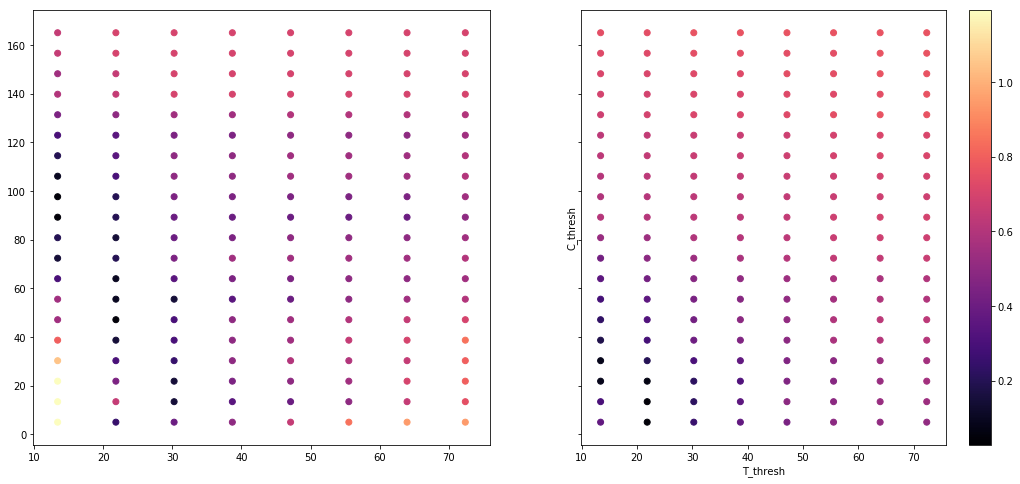

In [103]:
trans_runs= np.load('trans_runs_2nd4ptscheck.npy')[()]
num_top_keys = 4
num_full_keys = 6
num_tran_keys = 5
index = list(range(len(np.linspace(5, 165, 20))**2))
c_threshes = []
t_threshes = []
trans_matrices = []
diags = []

for i in index:
    #Top_bottoms, Full_classif, N_transitions = trans_runs[trans_fil]
    Top_bottoms, Full_classif, N_transitions, trans_threshes, num_top_keys, num_full_keys, num_tran_keys, skeys, ckeys, num_tran_keys, num_total_frames = trans_runs[i][0]
    if trans_threshes[0] <= 80 and trans_threshes[0] > 5:

        t_threshes.append(trans_threshes[0])
        c_threshes.append(trans_threshes[1])
        sums = np.sum
        Tb_sums = [sums(Top_bottoms[:, c]) for c in range(num_top_keys)]
        Fc_sums = [sums(Full_classif[:, c]) for c in range(num_full_keys)]
        Nt_sums = sums(N_transitions, axis = 0)#[sums(N_transitions[:, c]) for c in range(num_tran_keys)]
        T_obb = Nt_sums
        trans_matrices.append(T_obb)
        diags.append([T_obb[i, i] for i in range(len(T_obb))])
d1_dists = [abs(true_diag[0]-diag[0])/ true_diag[0] for diag in diags] 
d2_dists = [abs(true_diag[1]-diag[1])/ true_diag[1] for diag in diags] 
    
print("range diag dists: ", min(d1_dists), max(d1_dists))
print("range antidiag diss: ", min(d2_dists), max(d2_dists))

fig, ax  = plt.subplots(ncols = 2, figsize = (18, 8), sharey=True, sharex=True)

norm = matplotlib.colors.Normalize(vmin=min(min(antidiag_dists),min(diag_dists)), vmax=max(max(antidiag_dists),max(diag_dists)))
#norm2 = matplotlib.colors.Normalize(vmin= vmax=)
scat = ax[0].scatter(t_threshes, c_threshes, c = d1_dists, cmap = 'magma', norm = norm)
cbar = plt.colorbar(scat)
ax[1].scatter(t_threshes, c_threshes, c = d2_dists, cmap = 'magma', norm = norm)

plt.xlabel("T_thresh")
plt.ylabel("C_thresh")
